In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import math
import scipy
import scipy.stats as stats

In [3]:
male_df = pd.DataFrame([140, 145, 160, 190, 155, 165, 150, 190, 195, 138, 160, 155, 153, 145, 170, 175, 175, 170, 180, 135, 170, 157, 130, 185, 190, 155, 170, 155, 215, 150, 145, 155, 155, 150, 155, 150, 180, 160, 135, 160, 130, 155, 150, 148, 155, 150, 140, 180, 190, 145, 150, 164, 140, 142, 136, 123, 155],
    columns=['weight'])
male_df['sex'] = 'male'
female_df = pd.DataFrame([140, 120, 130, 138, 121, 116, 125, 145, 150, 112, 125, 130, 120, 130, 131, 120, 118, 125, 135, 125, 118, 122, 115, 102, 115, 150, 110, 116, 108, 95, 125, 133, 110, 150, 108],
    columns=['weight'])
female_df['sex'] = 'female'

weights_df = pd.concat([male_df, female_df], ignore_index=True)
weights_df.sample(5)

,weight,sex
88,133,female
76,125,female
54,136,male
9,138,male
71,131,female


In [4]:
weights_df.shape

(92, 2)

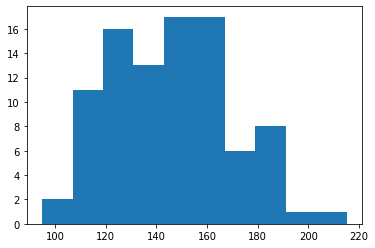

In [6]:
plt.hist(weights_df['weight']);

To have one bin for each value...

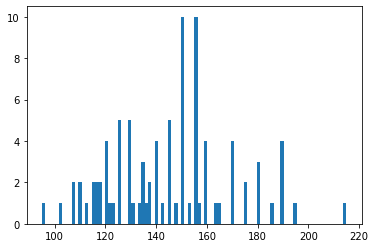

In [8]:
plt.hist(weights_df['weight'], bins=len(weights_df['weight']));

It is not very useful this way, it is better to have a number of bins that show useful data.

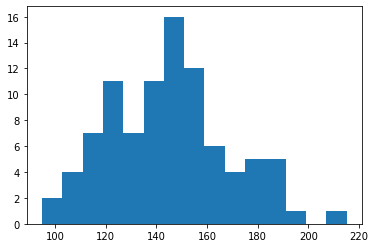

In [10]:
plt.hist(weights_df['weight'], bins=15);

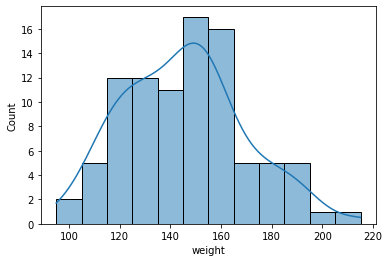

In [12]:
sns.histplot(weights_df['weight'], bins=12, kde=True);

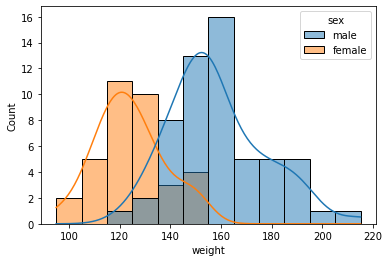

In [16]:
sns.histplot(data=weights_df, x='weight', hue='sex', bins=12, kde=True);

In [17]:
weights_df.describe()

,weight
count,92.000000
mean,145.152174
std,23.739398
min,95.000000
25%,125.000000
50%,145.000000
75%,155.500000
max,215.000000


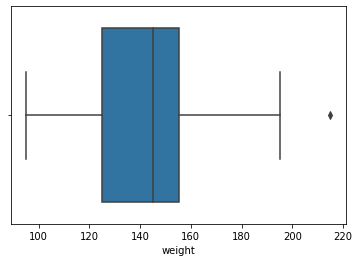

In [19]:
sns.boxplot(x=weights_df['weight']);

## Bernoulli process

Tossing a coin 10 times, with a probability of 0.3 (trick coin)

In [20]:
np.random.binomial(n=1, p=0.3, size=10)

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0])

In [30]:
np.random.binomial(n=20, p=0.3, size=10)

array([8, 3, 6, 7, 6, 6, 6, 2, 3, 5])

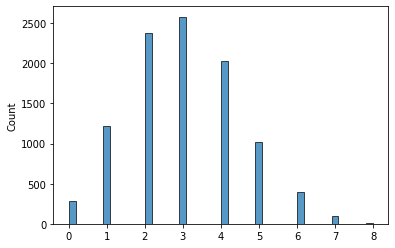

In [34]:
n = 10
sns.histplot(np.random.binomial(n=n, p=0.3, size=10000), kde=False);

## Binomial distribution

We calculate the PMF

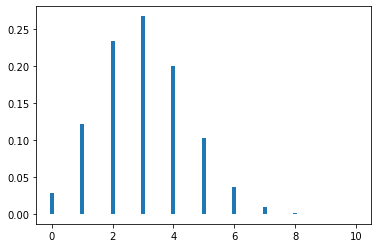

In [37]:
n = 10
p = 0.3

x = np.arange(n + 1)
pmf = stats.binom.pmf(x, n, p)
plt.vlines(x, 0, pmf, linewidth=4)

If we divide by $n$ we get the distribution

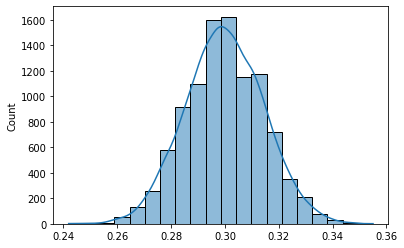

In [40]:
n = 1000
sns.histplot(np.random.binomial(n=n, p=0.3, size=10000) / n, kde=True, bins=20);

## Normal distribution

### PDF

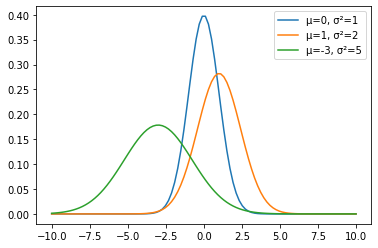

In [43]:
def plot_normal_distribution(mu, variance):
    sigma = math.sqrt(variance)
    x = np.linspace(-10, 10, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), label=f"μ={mu}, σ²={variance}")

plot_normal_distribution(0, 1)
plot_normal_distribution(1, 2)
plot_normal_distribution(-3, 5)
plt.legend();

### CDF

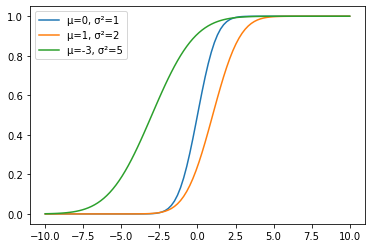

In [45]:
def plot_cumulative_normal_distribution(mu, variance):
    sigma = math.sqrt(variance)
    x = np.linspace(-10, 10, 100)
    plt.plot(x, stats.norm.cdf(x, mu, sigma), label=f"μ={mu}, σ²={variance}")

plot_cumulative_normal_distribution(0, 1)
plot_cumulative_normal_distribution(1, 2)
plot_cumulative_normal_distribution(-3, 5)
plt.legend();